# SS2 - Practica 2
## Estuardo Gabriel Son Mux - 202003894

### Importación de librerías necesarias para la ejecución del código
Importacion de las librerias pandas y matplotlib

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Lectura de archivo de entrada
Leer el archivo de entrada con pandas

In [238]:
df = pd.read_csv('datos.csv')
df

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,"2,813 reviews",NaN,"['Art History', 'Art', 'History', 'Creativity']","['Introduction', 'Heroes', 'Silhouettes', 'Cou...","['Anna Burckhardt', 'Paola Antonelli', 'Michel...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/fashion-design
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,100 reviews,NaN,[],"['Orientation', 'Module 1', 'Module 2', 'Modul...",['Cary Nelson'],['University of Illinois at Urbana-Champaign'],Arts and Humanities,https://www.coursera.org/learn/modern-american...
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,227 reviews,NaN,[],"['Week 1: Introduction to Pixel Art', 'Week 2:...","['Andrew Dennis', 'Ricardo Guimaraes']",['Michigan State University'],Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...
3,Distribución digital de la música independiente,NaN,Beginner level,Approx. 8 hours to complete,Flexible schedule,NaN,NaN,[],"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",['Eduardo de la Vara Brown.'],['SAE Institute México'],Arts and Humanities,https://www.coursera.org/learn/distribucion-di...
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,582 reviews,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9590,Power Onboarding,4.1,Beginner level,Approx. 7 hours to complete,Flexible schedule,36 reviews,NaN,[],"['Week 1 - Get Ready', 'Session 2 - Get Set', ...",['William J. White'],['Northwestern University'],Social Sciences,https://www.coursera.org/learn/power-onboarding
9591,Implementing Parent Feedback with Google Forms,4.9,Beginner level,NaN,NaN,77 reviews,Creating engaging parent surveys using Google ...,"['Education', 'online tools', 'engagement', 'e...",['Learn step-by-step'],['Rachel Lindsay'],['Coursera Project Network'],Social Sciences,https://www.coursera.org/projects/education-fe...
9592,"""Making"" Progress Teach-Out",4.2,Beginner level,Approx. 5 hours to complete,Flexible schedule,10 reviews,NaN,[],"['Week 1', 'WEEK 2']",['Pablo Palomino'],['Emory University'],Social Sciences,https://www.coursera.org/learn/makingprogress
9593,Use Microsoft PowerPoint to Create a Visual Sc...,4.5,Beginner level,1 hour,NaN,11 reviews,Learn about choice boards and their use within...,"['Teaching tools', 'elementary teaching', 'eng...",['Learn step-by-step'],['Rachel Lindsay'],['Coursera Project Network'],Social Sciences,https://www.coursera.org/projects/use-microsof...


### Filtrado de datos
Se eliman los datos duplicados y se muestran los datos filtrados

In [239]:
df = df.drop_duplicates()

Se crea y aplica un filtro para reemplazan los valores nulos por 0 y convertirlos a float

In [240]:
fRating = df["Rating"].replace(np.nan, "0").astype(float)
df.loc[:,("Rating")] = fRating

Obtener valores unicos de la columna Level

In [241]:
uLevel = df['Level'].unique()
uLevel

array(['Beginner level', 'Intermediate level', nan, 'Advanced level'],
      dtype=object)

Cambio de valores nulos en la columna Level por el valor "Not assigned"

In [242]:
fNan = df["Level"].replace(np.nan, "Not assigned")
df.loc[:,("Level")] = fNan

Cambio de valores nulos en la columna Duration y Review a 0

In [243]:
fNan = df["Duration"].replace(np.nan, "0")
df.loc[:,("Duration")] = fNan
fNan = df["Review"].replace(np.nan, "0")
df.loc[:,("Review")] = fNan

Funcion para convertir el texto de duracion a horas

In [244]:
import re
def convert_to_hours(duration):
    month = 0
    hour = 0
    minute = 0
    matchHour = re.findall(r'((\d+(\.\d+)?)|one|two|three)\s*(hour|hours)', duration)
    matchMin = re.findall(r'((\d+(\.\d+)?)|one|two|three)\s*(minute|mins)', duration)
    matchMonth = re.findall(r'((\d+(\.\d+)?)|one|two|three)\s*(month)', duration)
    if matchHour:
        if matchHour[0][0] == "one":
            hour = 1.0
        elif matchHour[0][0] == "two":
            hour = 2.0
        elif matchHour[0][0] == "three":
            hour = 3.0
        else:
            hour = float(matchHour[0][0])
    if matchMin:
        if matchMin[0][0] == "one":
            minute = 1.0
        elif matchMin[0][0] == "two":
            minute = 2.0
        elif matchMin[0][0] == "three":
            minute = 3.0
        else:
            minute = float(matchMin[0][0])
    if matchMonth:
        if matchMonth[0][0] == "one":
            month = 1.0
        elif matchMonth[0][0] == "two":
            month = 2.0
        elif matchMonth[0][0] == "three":
            month = 3.0
        else:
            month = float(matchMonth[0][0])*30
    
    return ((hour+minute)*month if month>0 else hour+minute)

Se convierten los valores de la columna Duration a float

In [245]:
fDuration = df['Duration'].apply(convert_to_hours)
df.loc[:,('Duration')] = fDuration

Se convierten los valores de la columna Review a float

In [246]:
fReview = df['Review'].str.extract(r'((\d+,\d+)|(\d+))', expand=True)[0].str.replace(',', '').astype(float)
df.loc[:,('Review')] = fReview

In [247]:
df

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
0,Fashion as Design,4.8,Beginner level,20.0,Flexible schedule,2813.0,NaN,"['Art History', 'Art', 'History', 'Creativity']","['Introduction', 'Heroes', 'Silhouettes', 'Cou...","['Anna Burckhardt', 'Paola Antonelli', 'Michel...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/fashion-design
1,Modern American Poetry,4.4,Beginner level,34.0,Flexible schedule,100.0,NaN,[],"['Orientation', 'Module 1', 'Module 2', 'Modul...",['Cary Nelson'],['University of Illinois at Urbana-Champaign'],Arts and Humanities,https://www.coursera.org/learn/modern-american...
2,Pixel Art for Video Games,4.5,Beginner level,9.0,Flexible schedule,227.0,NaN,[],"['Week 1: Introduction to Pixel Art', 'Week 2:...","['Andrew Dennis', 'Ricardo Guimaraes']",['Michigan State University'],Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...
3,Distribución digital de la música independiente,0.0,Beginner level,8.0,Flexible schedule,0.0,NaN,[],"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",['Eduardo de la Vara Brown.'],['SAE Institute México'],Arts and Humanities,https://www.coursera.org/learn/distribucion-di...
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,11.0,Flexible schedule,582.0,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8690,Architecting with Google Kubernetes Engine: Pr...,4.9,Intermediate level,14.0,Flexible schedule,30.0,NaN,[],"['Introducción al curso', 'Control de acceso y...",['Google Cloud Training'],['Google Cloud'],Social Sciences,https://www.coursera.org/learn/deploying-secur...
8691,Computational Thinking for K-12 Educators: Nes...,0.0,Beginner level,11.0,Flexible schedule,0.0,NaN,"['Education', 'want', 'Resource', 'Causality']","['Course Orientation', 'Nested If/Else Part 1'...",['Beth Simon'],['University of California San Diego'],Social Sciences,https://www.coursera.org/learn/block-programmi...
8692,Cómo combinar y analizar datos complejos,0.0,Not assigned,9.0,Flexible schedule,0.0,NaN,[],"['Estimación básica', 'Modelos', 'Vinculación ...","['Richard Valliant, Ph.D.']","['University of Maryland, College Park']",Social Sciences,https://www.coursera.org/learn/data-collection...
8693,Architecting with Google Kubernetes Engine: Wo...,0.0,Intermediate level,19.0,Flexible schedule,0.0,NaN,[],"['Introdução ao curso', 'Operações do Kubernet...",['Google Cloud Training'],['Google Cloud'],Social Sciences,https://www.coursera.org/learn/deploying-workl...


### Calculos

#### 1. Promedio de calificaciones para cada curso

In [248]:
print("CALCULO DE PROMEDIO DE CALIFICACIONES PARA CADA CURSO ")
promedio = df.groupby('Course Title')['Rating'].mean()
for curso,rating in promedio.items():
    print(f'CURSO: {curso} \n\t- PROMEDIO: {rating}')

CALCULO DE PROMEDIO DE CALIFICACIONES PARA CADA CURSO 
CURSO:  Assisting Public Sector Decision Makers With Policy Analysis 
	- PROMEDIO: 4.8
CURSO:  Atención prehospitalaria del ictus agudo y selección de pacientes para tratamiento endovascular con la escala RACE 
	- PROMEDIO: 4.9
CURSO:  Build a social media presence for your business using Canva 
	- PROMEDIO: 4.7
CURSO:  Build social awareness content for Twitter with Canva 
	- PROMEDIO: 0.0
CURSO:  Comercio, Inmigración y Tipos de Cambio en un Mundo Globalizado 
	- PROMEDIO: 4.9
CURSO:  FPGA computing systems: Background knowledge and introductory materials 
	- PROMEDIO: 4.6
CURSO:  Fundamentals of Business Problem Solving 
	- PROMEDIO: 0.0
CURSO:  Future Healthcare Payment Models 
	- PROMEDIO: 4.5
CURSO:  Generative AI: Elevate Your Data Science Career 
	- PROMEDIO: 0.0
CURSO:  HEALTHY URBAN SYSTEMS - PART 1 
	- PROMEDIO: 0.0
CURSO:  How to create Social Media graphics in Canva  
	- PROMEDIO: 4.2
CURSO:  IBM and ISC2 Cybersecurity


#### 2. Calcular los cursos con mayor y menor Rating 
Filtrando unicamente los cursos con rating mayor a 0 y ordenando de forma descendente y ascendente respectivamente

In [249]:
maxRating = df[df['Rating']>0].groupby('Course Title').max('Rating').sort_values(by='Rating',ascending=False).head(3)
minRating = df[df['Rating']>0].groupby('Course Title').min('Rating').sort_values(by='Rating',ascending=True).head(3)

print("CURSOS CON MAYOR RATING")
for curso,rating in maxRating['Rating'].items():
    print(f'CURSO: {curso} \n\t- RATING: {rating}')
print("\nCURSOS CON MENOR RATING")
for curso,rating in minRating['Rating'].items():
    print(f'CURSO: {curso} \n\t- RATING: {rating}')

CURSOS CON MAYOR RATING
CURSO: Compromiso del paciente: resultados clínicos satisfactorios Specialization 
	- RATING: 5.0
CURSO: Exploring Beethoven's Piano Sonatas Part 5 
	- RATING: 5.0
CURSO: Question Reality! Science, philosophy, a search for meaning Specialization 
	- RATING: 5.0

CURSOS CON MENOR RATING
CURSO: Build a computer vision app with Azure Cognitive Services 
	- RATING: 1.5
CURSO: Excel for Beginners: Beginner Functions 
	- RATING: 1.5
CURSO: Build automated speech systems with Azure Cognitive Services 
	- RATING: 1.5


#### 3. Calcular el porcentaje de cursos con horario flexible en relación con el total de cursos en el conjunto de datos
Filtrar datos con horario flexible y contarlos

In [250]:
cFlexibles = df[df['Schedule'] == 'Flexible schedule'].shape[0]

Calcular el porcentaje de cursos con horario flexible

In [251]:
porcentaje = (cFlexibles/df.shape[0])*100
print(f'PORCENTAJE DE CURSOS CON HORARIO FLEXIBLE: %.2f%%' % porcentaje)

PORCENTAJE DE CURSOS CON HORARIO FLEXIBLE: 92.63%


### Graficos

#### 1. Gráfica de barras que muestre el número de cursos en cada nivel de dificultad

Crear filtros para cada nivel de dificultad

In [252]:
valores = df['Level'].value_counts()

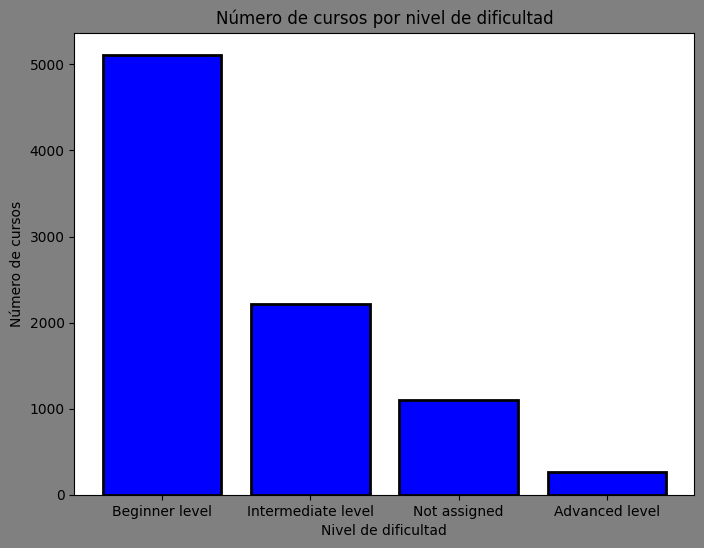

In [253]:
## GRAFICO DE BARRAS
fig, ax = plt.subplots(figsize=(8, 6))

## DEFINIR COLORES
fig.patch.set_facecolor('gray')
ax.set_facecolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

## ASIGNAR VALORES DE LOS EJES
ax.bar(valores.index, valores.values, color='blue', edgecolor='black', linewidth=2)
ax.set_title('Número de cursos por nivel de dificultad')
ax.set_xlabel('Nivel de dificultad')
ax.set_ylabel('Número de cursos')
plt.show()

#### 2. Gráfica de barras horizontal que muestre el número de cursos en las principales categorías
Obtener el numero de cursos por categoria

In [254]:
valores = df['Keyword'].value_counts()

Estilo de la grafica

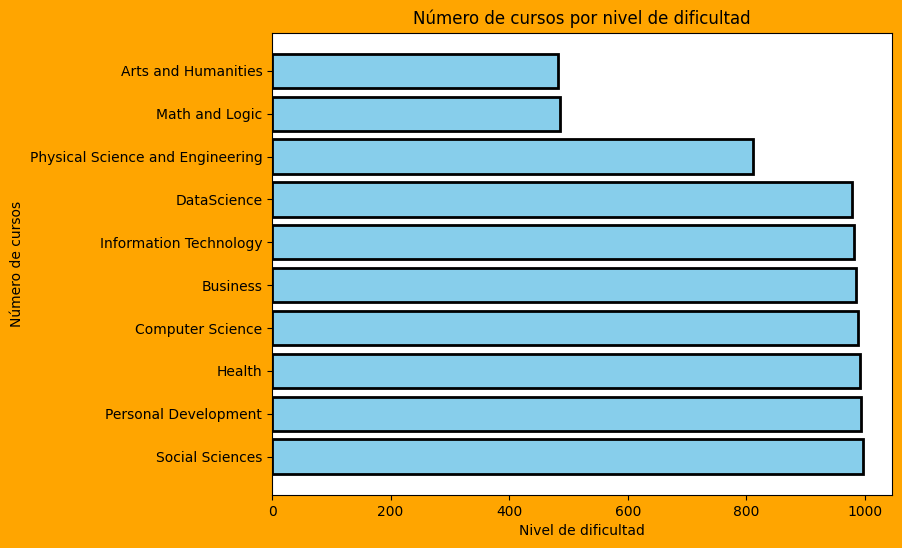

In [255]:
# Aplicar estilos a la gráfica
fig, ax = plt.subplots(figsize=(8, 6))

# Definir colores
fig.patch.set_facecolor('orange')
ax.set_facecolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

# Asignar valores de los ejes
ax.barh(valores.index, valores.values, color='skyblue', edgecolor='black', linewidth=2)
ax.set_title('Número de cursos por nivel de dificultad')
ax.set_xlabel('Nivel de dificultad')
ax.set_ylabel('Número de cursos')
plt.show()

#### 3. Gráfico de dispersión para visualizar la relación entre la duración del curso y el número de revisiones

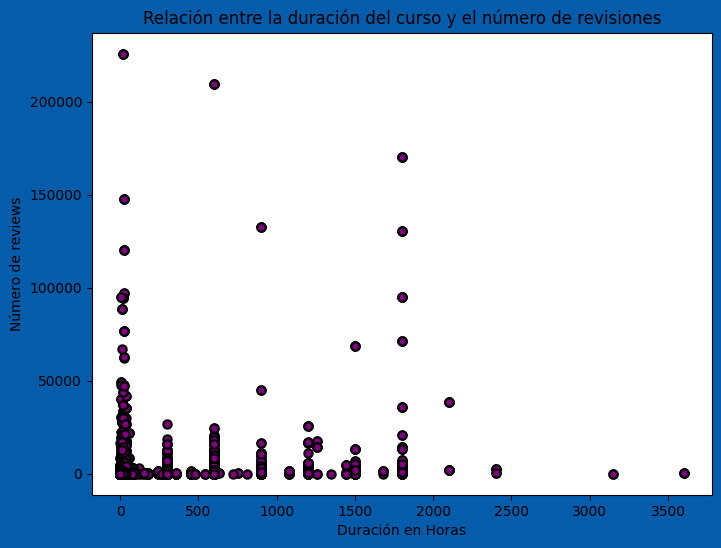

In [256]:
# Aplicar estilos a la gráfica
fig, ax = plt.subplots(figsize=(8, 6))

# Definir colores
fig.patch.set_facecolor('#045cab')
ax.set_facecolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

# Asignar valores de los ejes
ax.scatter(df["Duration"], df["Review"], color='purple', edgecolor='black', linewidth=1.5)
ax.set_title('Relación entre la duración del curso y el número de revisiones')
ax.set_xlabel('Duración en Horas')
ax.set_ylabel('Número de reviews')
plt.show()

#### 4. Histograma de la distribución de las duraciones de los cursos

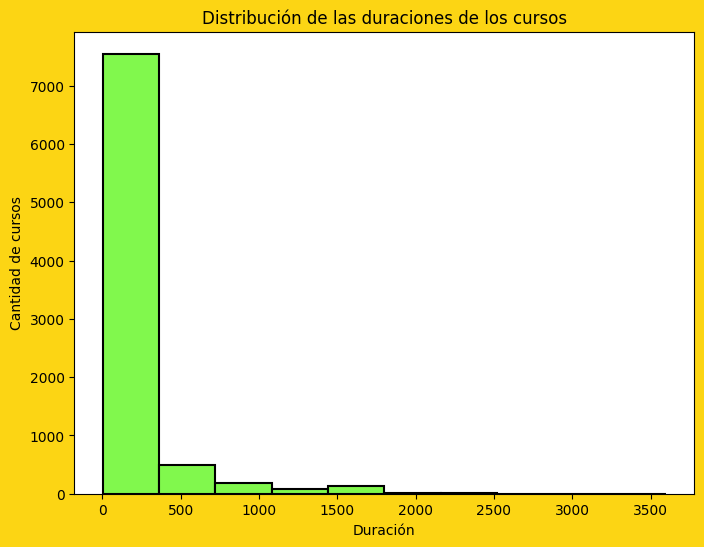

In [257]:
# Filtrar los cursos con duración mayor a 0
fDuracion = df[df['Duration'] > 0]

# Aplicar estilos a la gráfica
fig, ax = plt.subplots(figsize=(8, 6))

# Definir colores
fig.patch.set_facecolor('#FCD514')
ax.set_facecolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

# Asignar valores de los ejes
ax.hist( fDuracion['Duration'], bins=10,  color='#81F84D', edgecolor='black', linewidth=1.5)
ax.set_title('Distribución de las duraciones de los cursos')
ax.set_xlabel('Duración')
ax.set_ylabel('Cantidad de cursos')

plt.show()

####  5. Gráfico de cajas para visualizar la distribución de las calificaciones de los cursos por nivel de dificultad

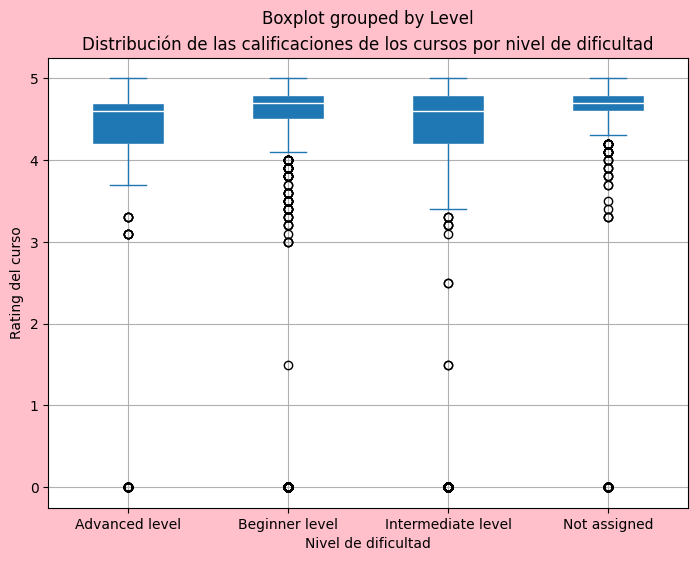

In [258]:
# Aplicar estilos a la gráfica
fig, ax = plt.subplots(figsize=(8, 6))

# Definir colores
fig.patch.set_facecolor('pink')
ax.set_facecolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

# Asignar valores de los ejes
df.boxplot(column='Rating', by='Level', ax=ax, patch_artist=True,
                medianprops={"color": "white"},
                boxprops={"facecolor": "C0", "edgecolor": "white"},
                whiskerprops={"color": "C0"},
                capprops={"color": "C0"})

ax.set_title('Distribución de las calificaciones de los cursos por nivel de dificultad')
ax.set_xlabel('Nivel de dificultad')
ax.set_ylabel('Rating del curso')

plt.show()